Andi Nur Salsabila

In [12]:
import pandas as pd
import os

In [13]:
# mengakses kaggle
os.environ['KAGGLE_USERNAME'] = "andinursalsabila"
os.environ['KAGGLE_KEY'] = "32050edd6e02f12f21dd3a78eaaba64e"

# copy API command dataset untuk mendownloadnya
!kaggle datasets download -d saurabhshahane/ecommerce-text-classification

ecommerce-text-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzip dataset yang telah didownload
!unzip -q /content/ecommerce-text-classification.zip

In [ ]:
data = pd.read_csv('ecommerceDataset.csv', names=['label', 'sentence'])
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

label       0
sentence    0
dtype: int64

In [ ]:
category = pd.get_dummies(data.label)
new_data = pd.concat([data, category], axis=1)
new_data = new_data.drop(columns='label')
new_data

,sentence,Books,Clothing & Accessories,Electronics,Household
0,Paper Plane Design Framed Wall Hanging Motivat...,0,0,0,1
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...",0,0,0,1
2,SAF 'UV Textured Modern Art Print Framed' Pain...,0,0,0,1
3,"SAF Flower Print Framed Painting (Synthetic, 1...",0,0,0,1
4,Incredible Gifts India Wooden Happy Birthday U...,0,0,0,1
...,...,...,...,...,...
50420,Strontium MicroSD Class 10 8GB Memory Card (Bl...,0,0,1,0
50421,CrossBeats Wave Waterproof Bluetooth Wireless ...,0,0,1,0
50422,Karbonn Titanium Wind W4 (White) Karbonn Titan...,0,0,1,0
50423,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...",0,0,1,0


In [ ]:
sentence = new_data['sentence'].values
label = new_data[['Books', 'Clothing & Accessories', 'Electronics', 'Household']].values

In [ ]:
from sklearn.model_selection import train_test_split

sentence_train, sentence_test, label_train, label_test = train_test_split(sentence, label, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='-')
tokenizer.fit_on_texts(sentence_train)
tokenizer.fit_on_texts(sentence_test)

seq_train = tokenizer.texts_to_sequences(sentence_train)
seq_test = tokenizer.texts_to_sequences(sentence_test)

padded_train = pad_sequences(seq_train)
padded_test = pad_sequences(seq_test)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 15
history = model.fit(padded_train, label_train, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/15
1261/1261 - 303s - loss: 0.4818 - accuracy: 0.8271 - val_loss: 0.2477 - val_accuracy: 0.9314 - 303s/epoch - 240ms/step
Epoch 2/15
1261/1261 - 297s - loss: 0.2224 - accuracy: 0.9396 - val_loss: 0.1852 - val_accuracy: 0.9551 - 297s/epoch - 236ms/step
Epoch 3/15
1261/1261 - 301s - loss: 0.1728 - accuracy: 0.9574 - val_loss: 0.1770 - val_accuracy: 0.9582 - 301s/epoch - 238ms/step
Epoch 4/15
1261/1261 - 317s - loss: 0.1536 - accuracy: 0.9590 - val_loss: 0.1699 - val_accuracy: 0.9579 - 317s/epoch - 252ms/step
Epoch 5/15
1261/1261 - 306s - loss: 0.1476 - accuracy: 0.9611 - val_loss: 0.1805 - val_accuracy: 0.9574 - 306s/epoch - 242ms/step
Epoch 6/15
1261/1261 - 304s - loss: 0.1225 - accuracy: 0.9685 - val_loss: 0.1461 - val_accuracy: 0.9661 - 304s/epoch - 241ms/step
Epoch 7/15
1261/1261 - 300s - loss: 0.1089 - accuracy: 0.9722 - val_loss: 0.1546 - val_accuracy: 0.9619 - 300s/epoch - 238ms/step
Epoch 8/15
1261/1261 - 314s - loss: 0.1174 - accuracy: 0.9696 - val_loss: 0.1423 - val_acc

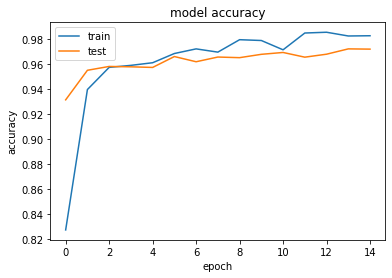

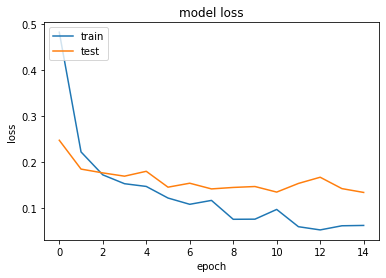

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()